[34747.91136448711, 37705.180378347875, 42141.08402190493, 49765.29397910768, 54016.3683550286, 68941.33600785458, 115841.7714101214, 159923.5669254865, 164775.33383538114, 185291.38787200462, 167455.35969138792, 220547.5823154149, 223412.4369951048, 230435.9506980218, 294248.26900924835, 231591.13406119854, 198599.09944353258, 233485.6307229002, 241433.29136323143, 233393.21658878966, 194579.0605858266, 231868.37475060154, 206777.79582621562, 194810.09867809532, 253955.48022095082, 303628.35652056395, 233762.87532089138, 217220.65139930314, 266662.49319495854, 201094.29686649184, 236073.24478250966, 355426.77472928807, 556336.232622925, 537853.3233190677, 394287.1515441089, 469466.467637187, 972664.2847107152, 1169507.4939727318, 1161190.158491285, 1137624.422936764, 1223570.0750002153, 964809.0140818525, 783676.2995591003, 881173.7585508017, 1116831.136375558, 624723.070218871, 505046.1180794455, 1226342.5045519308, 1393613.0535595962, 869621.9230478297, 1573359.533900823, 1611249.55

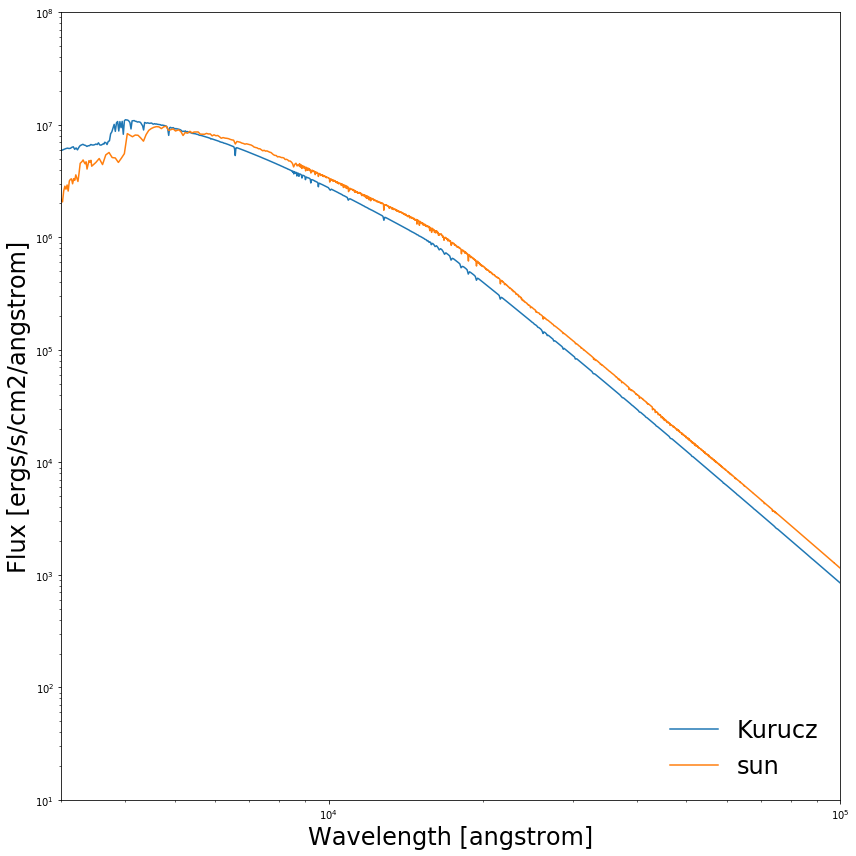

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from pystellibs import BaSeL, Kurucz
from astropy.io import fits as pyfits
import astropy.constants as c
f=pyfits.open('kurucz2004.grid.fits')

const=c.h.value*c.c.value*1e7*(c.au.value/c.R_sun.value)**2
energy=[]
for i in range(0,len(sun_data)):
    energy.append(sun_data[i,2]/1e4*const/(sun_data[i,0]*1e-6)/1e1)

print(energy)

wavelength=f[0].data[-1]
# load 2 libraries
basel = BaSeL()
sun_data=np.loadtxt('Sun_org.dat',skiprows=2)
kurucz = Kurucz()
ap = (3.8, 3.5, 0, 0.02)
sb = basel.generate_stellar_spectrum(*ap)
sk = kurucz.generate_stellar_spectrum(*ap)
plt.figure(figsize=(12,12))
#plt.loglog(wavelength, sb, label='BaSel')
plt.loglog(wavelength, sk/(4*np.pi*(c.R_sun.value*1e2)**2), label='Kurucz')
plt.loglog(sun_data[:,0]*1e4,energy, label='sun')
plt.legend(frameon=False, loc='lower right',fontsize=24)
plt.xlabel("Wavelength [angstrom]",fontsize=24)
plt.ylabel("Flux [ergs/s/cm2/angstrom]",fontsize=24)
plt.xlim(0.3e4, 10e4)
plt.ylim(1e1, 1e8)
plt.tight_layout()
plt.savefig("sun_ATLAS9_model.png",dpi=300)

In [53]:
help(kurucz.generate_stellar_spectrum)

Help on method generate_stellar_spectrum in module pystellibs.stellib:

generate_stellar_spectrum(logT, logg, logL, Z, raise_extrapolation=True, **kwargs) method of pystellibs.kurucz.Kurucz instance
    Generates individual spectrum for the given stars APs and the
    stellar library
    
    Returns NaN spectra if the boundary conditions are not met (no extrapolation)
    
    Parameters
    ----------
    logT: float
        temperature
    
    logg: float
        log-gravity
    
    logL: float
        log-luminosity
    
    Z: float
        metallicity
    
    raise_extrapolation: bool
        if set throw error on extrapolation
    
    null: value
        value of the flux when extrapolation and raise_extrapolation is not set
    
    returns
    -------
    s0: ndarray, shape=(len(stars), len(l0))
        array of spectra, one per input star
        Spectrum in ergs/s/AA or ergs/s/AA/Lsun



[34747.91136448711, 37705.180378347875, 42141.08402190493, 49765.29397910768, 54016.3683550286, 68941.33600785458, 115841.7714101214, 159923.5669254865, 164775.33383538114, 185291.38787200462, 167455.35969138792, 220547.5823154149, 223412.4369951048, 230435.9506980218, 294248.26900924835, 231591.13406119854, 198599.09944353258, 233485.6307229002, 241433.29136323143, 233393.21658878966, 194579.0605858266, 231868.37475060154, 206777.79582621562, 194810.09867809532, 253955.48022095082, 303628.35652056395, 233762.87532089138, 217220.65139930314, 266662.49319495854, 201094.29686649184, 236073.24478250966, 355426.77472928807, 556336.232622925, 537853.3233190677, 394287.1515441089, 469466.467637187, 972664.2847107152, 1169507.4939727318, 1161190.158491285, 1137624.422936764, 1223570.0750002153, 964809.0140818525, 783676.2995591003, 881173.7585508017, 1116831.136375558, 624723.070218871, 505046.1180794455, 1226342.5045519308, 1393613.0535595962, 869621.9230478297, 1573359.533900823, 1611249.55

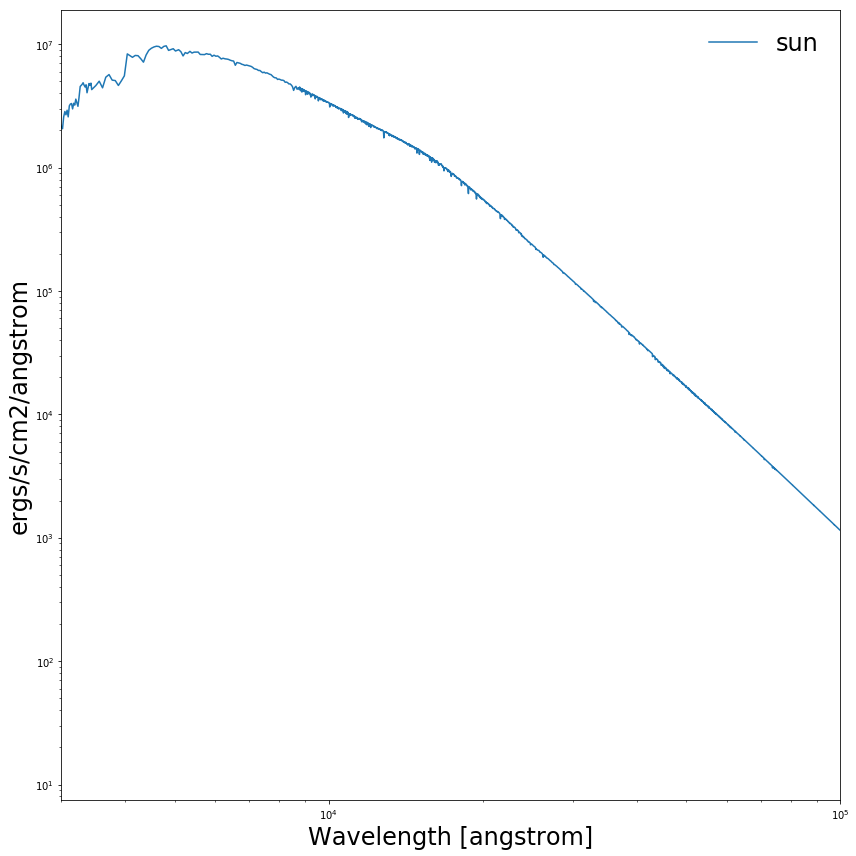

In [4]:
plt.figure(figsize=(12,12))
plt.loglog(sun_data[:,0]*1e4,energy, label='sun')
plt.legend(frameon=False, loc='best',fontsize=24)
plt.xlabel("Wavelength [angstrom]",fontsize=24)
plt.ylabel("ergs/s/cm2/angstrom",fontsize=24)
plt.xlim(0.3e4, 10e4)
#plt.ylim(1e25, 5e30)
plt.tight_layout()

In [68]:
delta_wavelength=(sun_data[1,0]-sun_data[0,0])*1e4
L_sun=0
for i in range(0,len(sun_data)):
    L_sun+=energy[i]*delta_wavelength
    
print(L_sun)

74595416647.17421


In [69]:
74595416647*4*np.pi*(c.R_sun.value*1e2)**2

4.53697111967456e+33

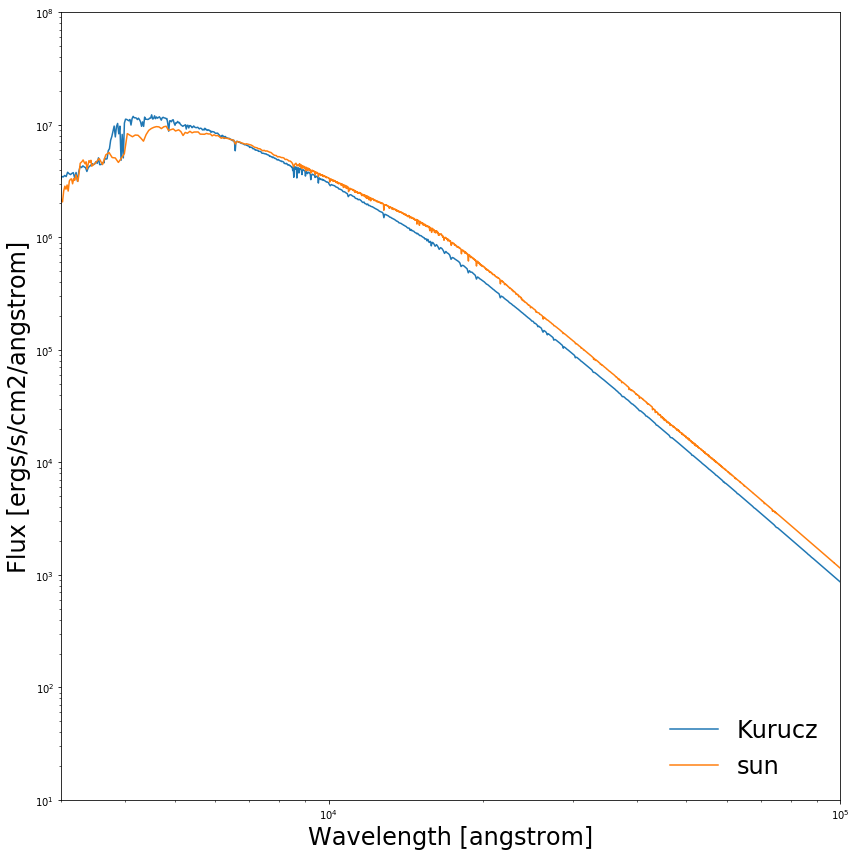

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from pystellibs import BaSeL, Kurucz
from astropy.io import fits as pyfits
import astropy.constants as c

sun_data=np.loadtxt('Sun_org.dat',skiprows=2)
f=pyfits.open('kurucz2004.grid.fits')
wavelength=f[0].data[-1]
# load 2 libraries
basel = BaSeL()
kurucz = Kurucz()

teff=3026
teff_err=150
log_teff=np.log10(teff)

mass=0.15
mass_err=0.01

rad=0.22
rad_err=0.01

g=c.G.value*c.M_sun.value/c.R_sun.value**2
ap = (3.8, 2.43, 0, 1)
sb = basel.generate_stellar_spectrum(*ap)
sk = kurucz.generate_stellar_spectrum(*ap)
plt.figure(figsize=(12,12))
#plt.loglog(wavelength, sb, label='BaSel')
plt.loglog(wavelength, sk/(4*np.pi*(c.R_sun.value*1e2)**2), label='Kurucz')
plt.loglog(sun_data[:,0]*1e4,energy, label='sun')
plt.legend(frameon=False, loc='lower right',fontsize=24)
plt.xlabel("Wavelength [angstrom]",fontsize=24)
plt.ylabel("Flux [ergs/s/cm2/angstrom]",fontsize=24)
plt.xlim(0.3e4, 10e4)
plt.ylim(1e1, 1e8)
plt.tight_layout()
plt.savefig("sun_ATLAS9_model.png",dpi=300)

'\'\na=input_parameter(m,teff,r,feh)\nlog_teff=a[0]\nlog_g=a[1]\nlog_L=a[2]\nz=a[3]\n\nap = (log_teff, log_g, log_L, z)\nf=pyfits.open(\'kurucz2004.grid.fits\')\nwavelength=f[0].data[-1]\n# load 2 libraries\nbasel = BaSeL()\nkurucz = Kurucz()\nsk = kurucz.generate_stellar_spectrum(*ap)\nplt.figure(figsize=(12,12))\nax2=plt.subplot(111)\nax2.loglog(wavelength, sk/(4*np.pi*(r*c.R_sun.value*1e2)**2), label=\'Kurucz\')\n#plt.loglog(sun_data[:,0]*1e4,energy, label=\'sun\')\nax2.legend(frameon=False, loc=\'lower right\',fontsize=24)\nax2.set_xlabel("Wavelength [angstrom]",fontsize=24)\nax2.set_ylabel("Flux [ergs/s/cm2/angstrom]",fontsize=24)\nax2.tick_params(axis=\'both\',direction=\'out\',which=\'major\',\n                width=2,length=8,color=\'black\',pad=1,labelsize=16,\n               labelbottom=True, labeltop=False,labelleft=True,labelright=False, )\nax2.tick_params(axis=\'both\',direction=\'out\',which=\'minor\',\n                width=1,length=4,color=\'black\',pad=1,labelsize=16,\

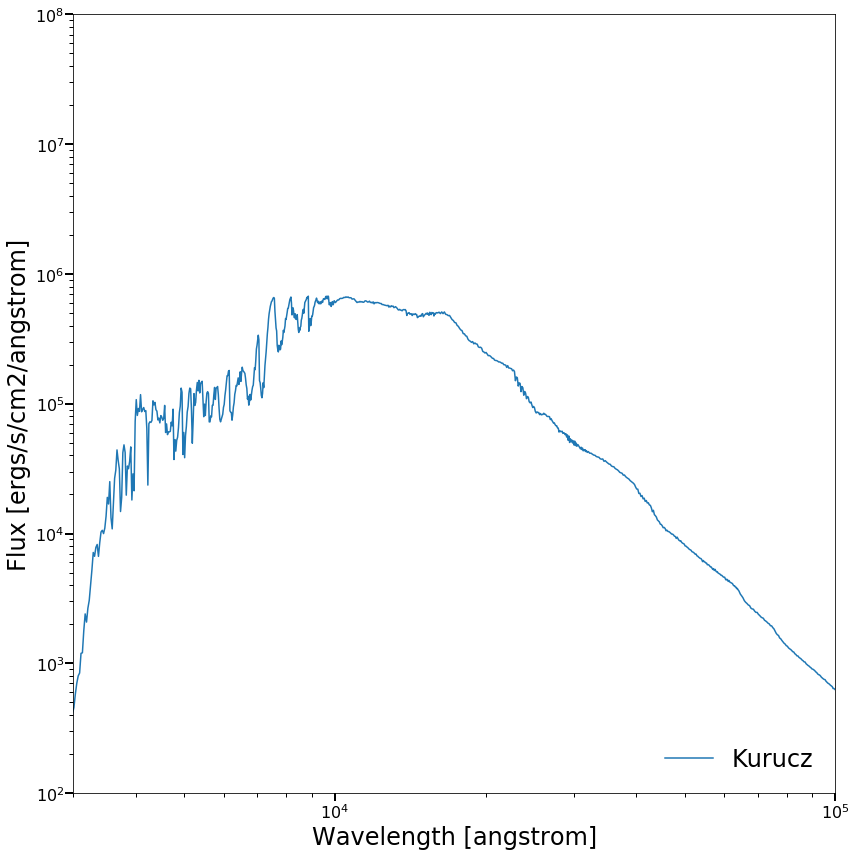

In [18]:
def input_parameter(m,teff,r,feh):
    s=5.67032e-8
    g=c.G.value*m*c.M_sun.value/(r*c.R_sun.value)**2
    L=4*np.pi*(r*c.R_sun.value)**2*s*1e7*teff**4
    L_sun=3.845e33 
    
    log_teff=np.log10(teff)
    log_g=np.log10(g)
    log_L=np.log10(L/L_sun)
    z=10**feh
    return log_teff,log_g,log_L,z

def draw(m,teff,r,feh,name):
    a=input_parameter(m,teff,r,feh)
    log_teff=a[0]
    log_g=a[1]
    log_L=a[2]
    z=a[3]

    ap = (log_teff, log_g, log_L, z)
    f=pyfits.open('kurucz2004.grid.fits')
    wavelength=f[0].data[-1]
    kurucz = Kurucz()
    sk = kurucz.generate_stellar_spectrum(*ap)
    plt.figure(figsize=(12,12))
    ax2=plt.subplot(111)
    ax2.loglog(wavelength, sk/(4*np.pi*(r*c.R_sun.value*1e2)**2), label='Kurucz')
    #plt.loglog(sun_data[:,0]*1e4,energy, label='sun')
    ax2.legend(frameon=False, loc='lower right',fontsize=24)
    ax2.set_xlabel("Wavelength [angstrom]",fontsize=24)
    ax2.set_ylabel("Flux [ergs/s/cm2/angstrom]",fontsize=24)
    ax2.tick_params(axis='both',direction='out',which='major',
                    width=2,length=8,color='black',pad=1,labelsize=16,
                   labelbottom=True, labeltop=False,labelleft=True,labelright=False, )
    ax2.tick_params(axis='both',direction='out',which='minor',
                    width=1,length=4,color='black',pad=1,labelsize=16,
                   labelbottom=True, labeltop=False,labelleft=True,labelright=False, )

    ax2.set_xlim(0.3e4, 10e4)
    ax2.set_ylim(1e2, 1e8)
    plt.tight_layout()


    plt.savefig('result/'+name+'.png',dpi=300)
    import csv
    with open('result/'+name+'_spectra.csv','w') as f:
        s=['wavelength','flux']
        writer=csv.DictWriter(f,fieldnames=s)
        writer.writeheader()
        for i in range(0,len(sk)):
            writer.writerow({'wavelength':wavelength[i],
                             'flux':sk[i]/(4*np.pi*(r*c.R_sun.value*1e2)**2),
                            })
    return 0

draw(0.15,3026,0.22,10**0.39,'GJ_1214_b')

#m=0.15
#teff=3026
#r=0.22
#feh=10**0.39

''''
a=input_parameter(m,teff,r,feh)
log_teff=a[0]
log_g=a[1]
log_L=a[2]
z=a[3]

ap = (log_teff, log_g, log_L, z)
f=pyfits.open('kurucz2004.grid.fits')
wavelength=f[0].data[-1]
# load 2 libraries
basel = BaSeL()
kurucz = Kurucz()
sk = kurucz.generate_stellar_spectrum(*ap)
plt.figure(figsize=(12,12))
ax2=plt.subplot(111)
ax2.loglog(wavelength, sk/(4*np.pi*(r*c.R_sun.value*1e2)**2), label='Kurucz')
#plt.loglog(sun_data[:,0]*1e4,energy, label='sun')
ax2.legend(frameon=False, loc='lower right',fontsize=24)
ax2.set_xlabel("Wavelength [angstrom]",fontsize=24)
ax2.set_ylabel("Flux [ergs/s/cm2/angstrom]",fontsize=24)
ax2.tick_params(axis='both',direction='out',which='major',
                width=2,length=8,color='black',pad=1,labelsize=16,
               labelbottom=True, labeltop=False,labelleft=True,labelright=False, )
ax2.tick_params(axis='both',direction='out',which='minor',
                width=1,length=4,color='black',pad=1,labelsize=16,
               labelbottom=True, labeltop=False,labelleft=True,labelright=False, )

ax2.set_xlim(0.3e4, 10e4)
ax2.set_ylim(1e2, 1e6)
plt.tight_layout()

import csv
plt.savefig("result/GJ_1214_b.png",dpi=300)

with open('result/GJ_1214_b_spectra.csv','w') as f:
    s=['wavelength','flux']
    writer=csv.DictWriter(f,fieldnames=s)
    writer.writeheader()
    for i in range(0,len(sk)):
        writer.writerow({'wavelength':wavelength[i],
                         'flux':sk[i]/(4*np.pi*(r*c.R_sun.value*1e2)**2),
                        })
    
'''

0

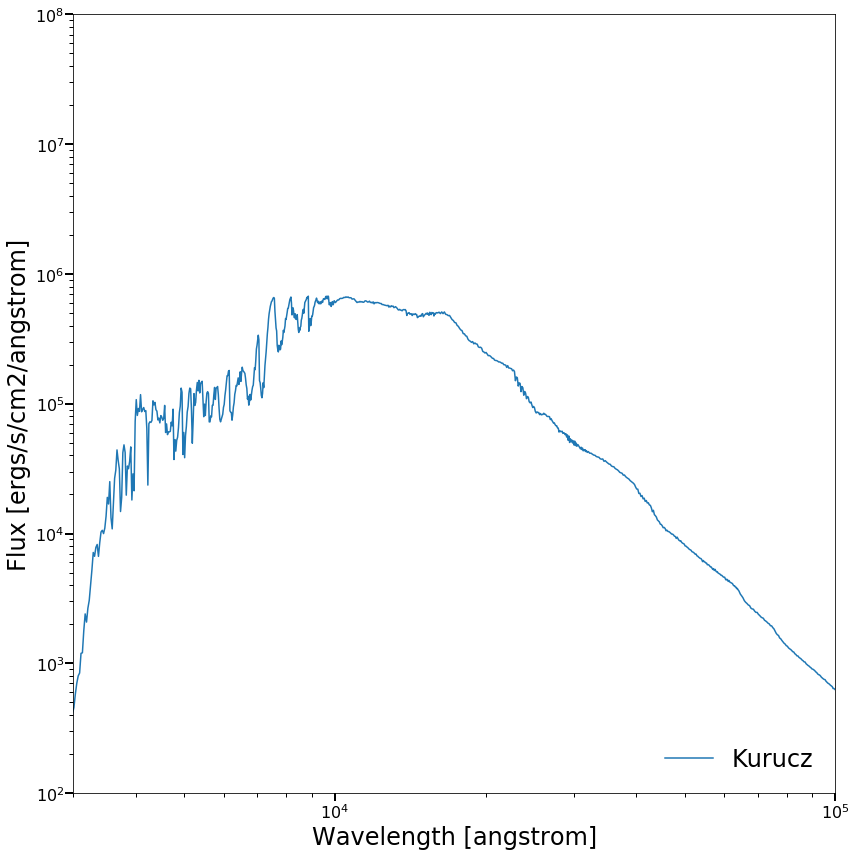

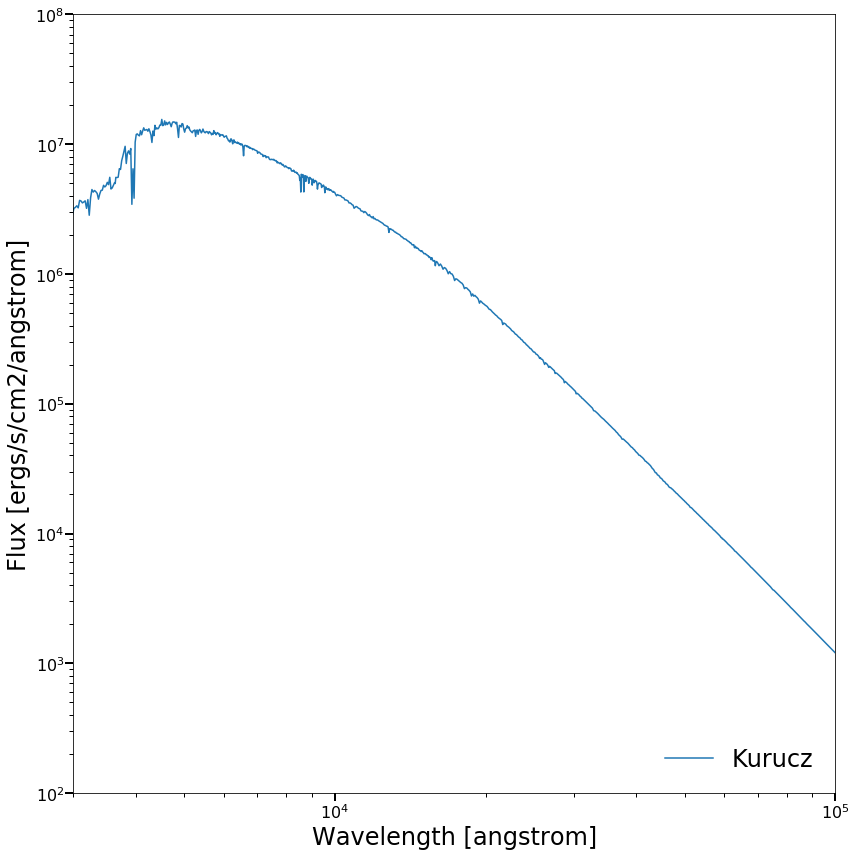

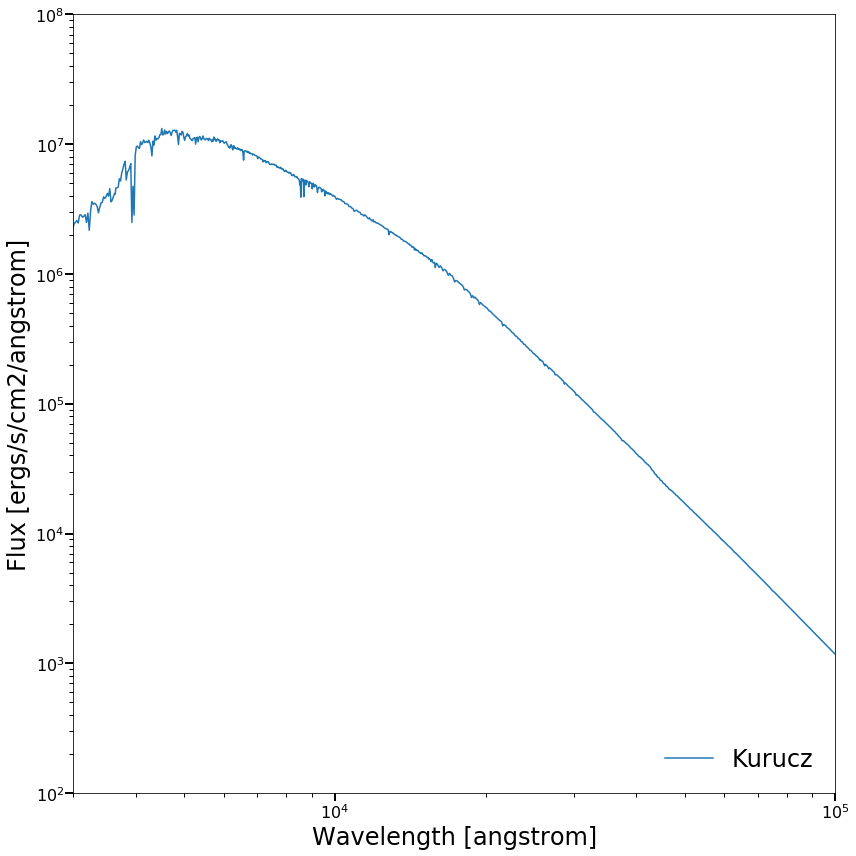

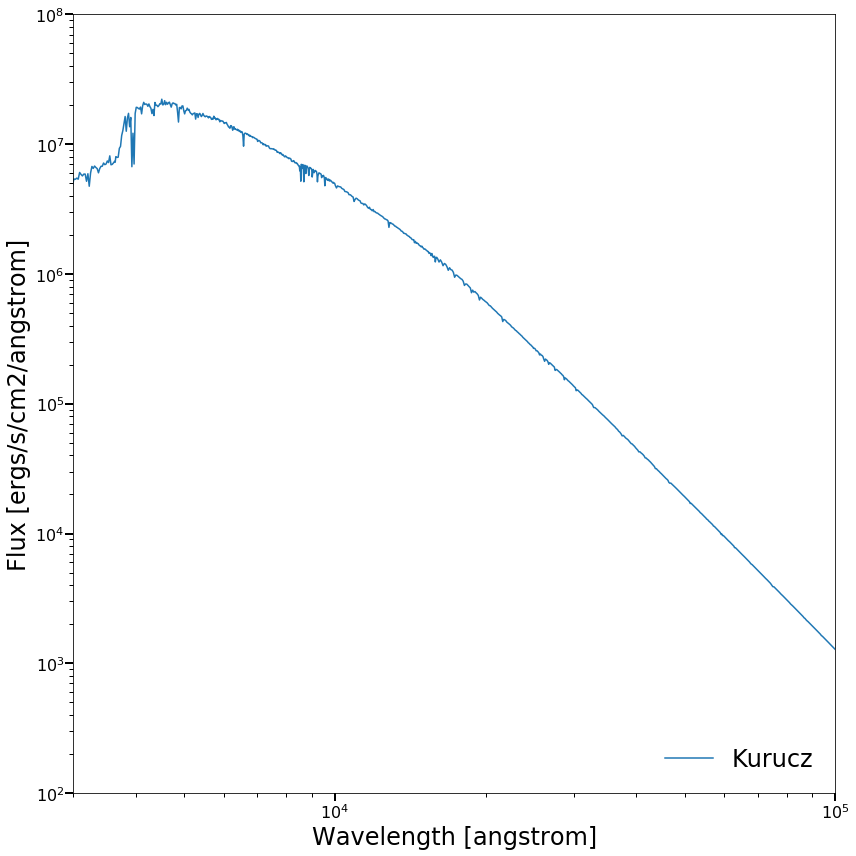

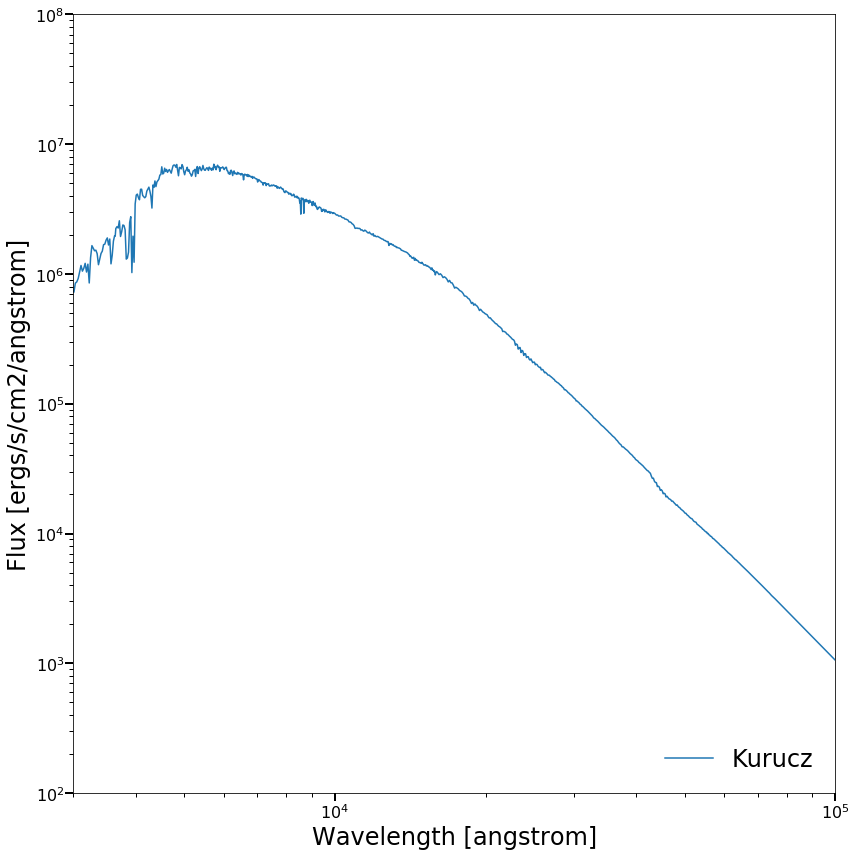

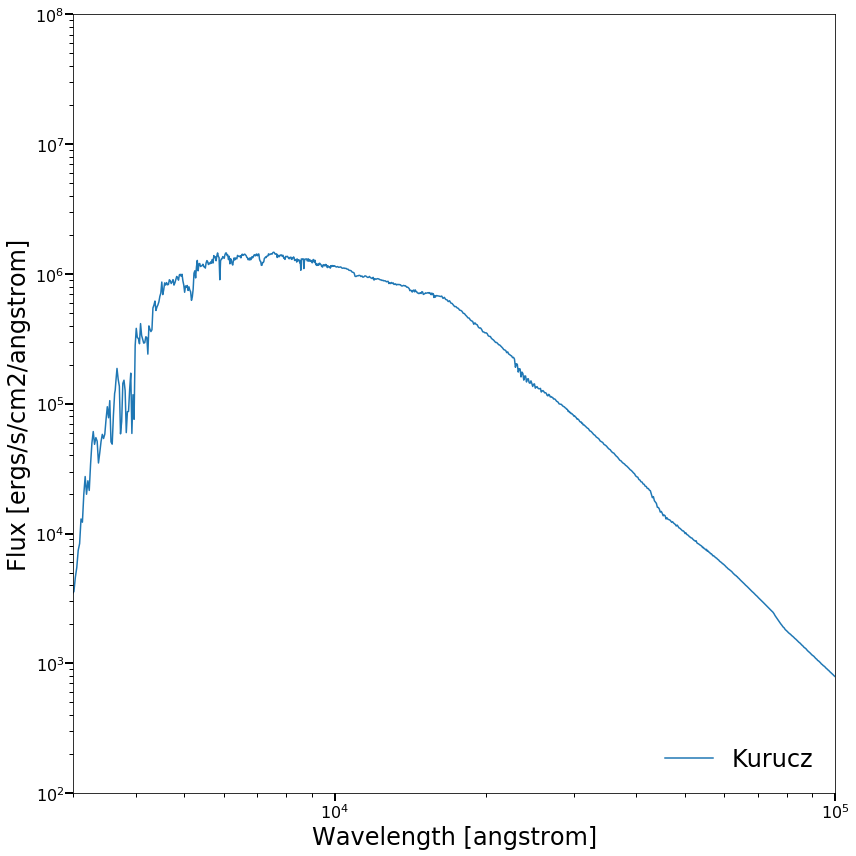

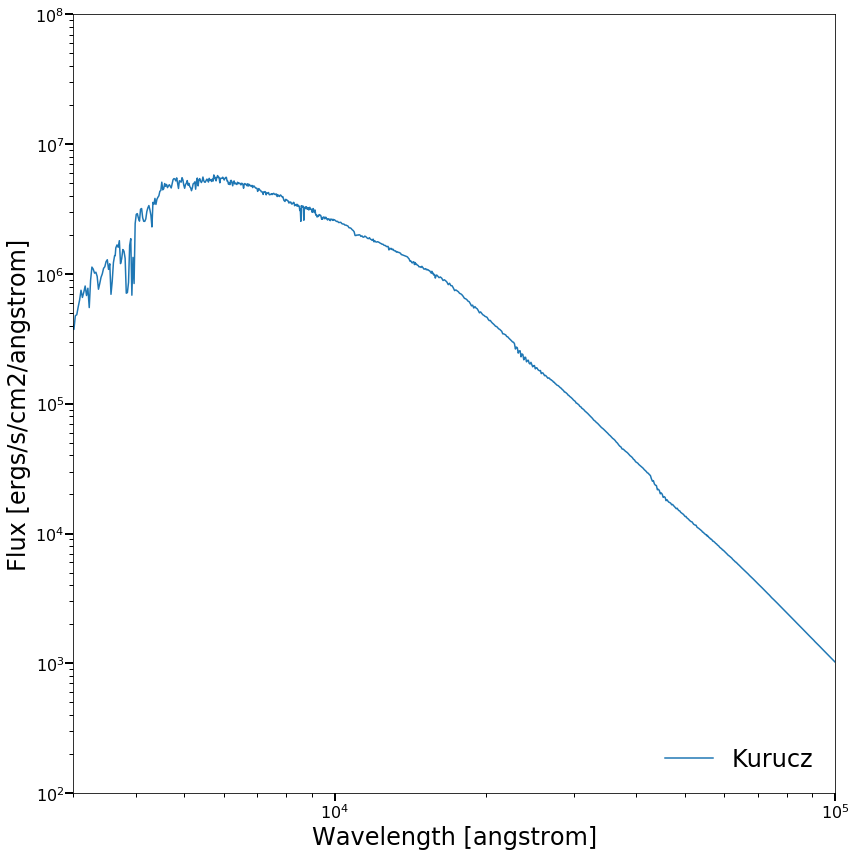

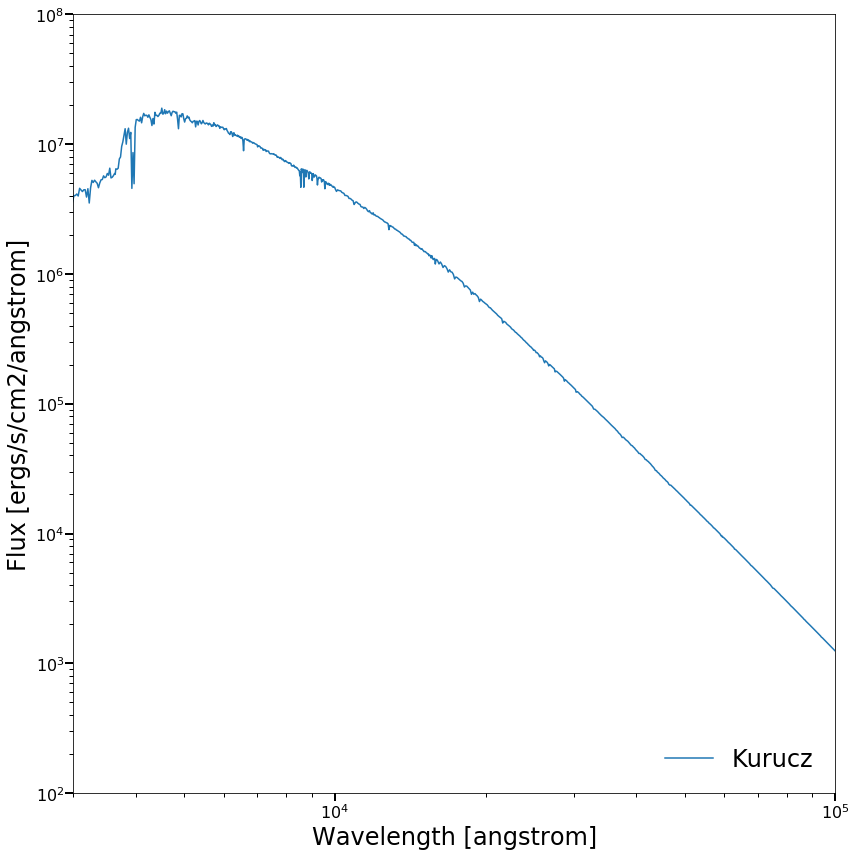

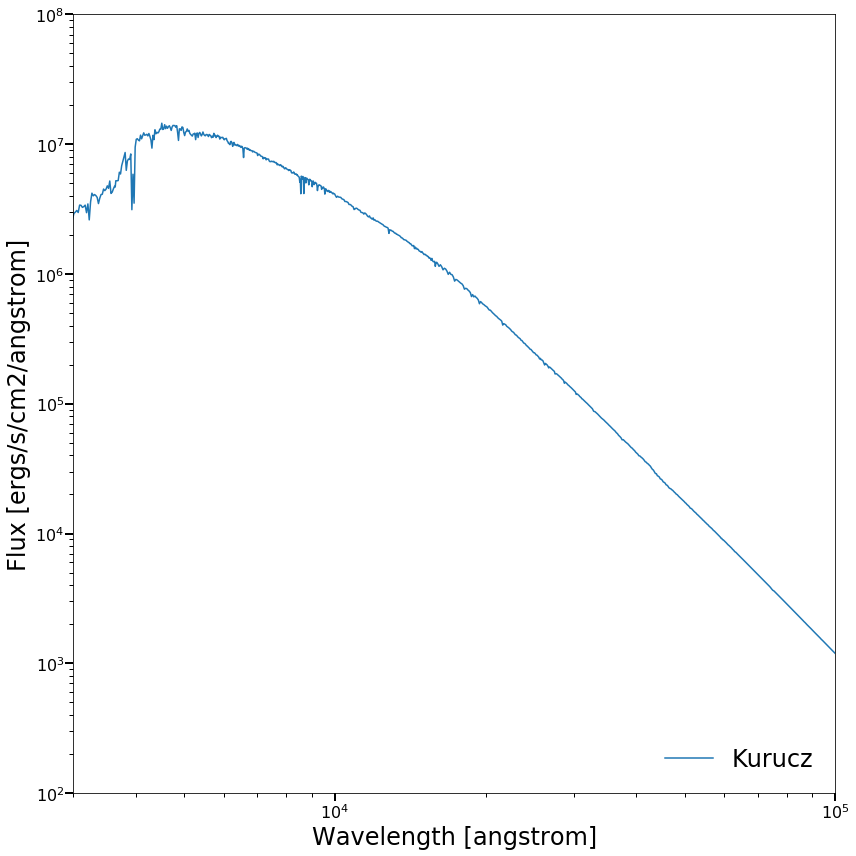

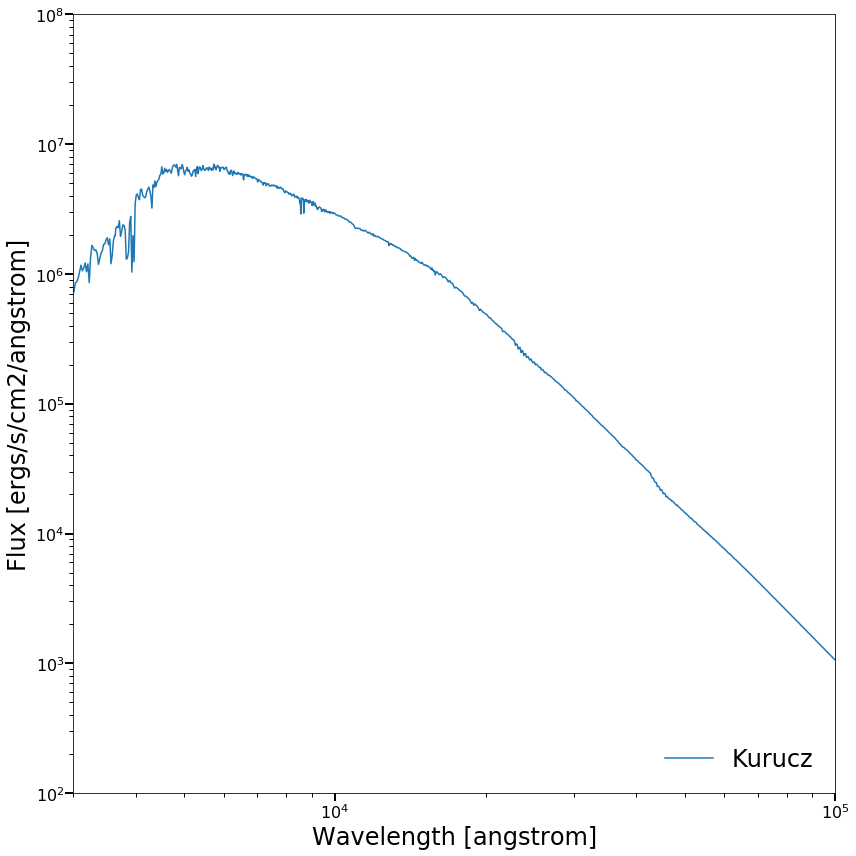

In [19]:
draw(0.15,3026,0.22,10**0.39,'GJ 1214 b')
draw(1.22,6158,1.24,10**0.17,'HAT-P-16 b')
draw(1.13,6001,1.37,10**(-0.16),'HAT-P-32 b')
draw(2.28,6550,1.49,10**(-0.19),'WASP-17 b')
draw(0.86,5400,0.89,10**(-0.03),'WASP-4 b')
draw(0.58,4143,0.59,10**(-0.14),'WASP-80 b')
draw(0.91,5196,0.94,10**0.31,'55 Cnc e')
draw(1.43,6360,1.66,10**0.3,'WASP-12 b')
draw(1.23,6091,1.19,10**0.02,'HD 209458 b')
draw(0.93,5400,0.9,10**(-0.12),'WASP-39 b')

In [8]:
def V_flux(mag):
    return 10**((mag-0)*(-0.4))*363.1e-11 ##unit ergs/s/cm2/AA

def V_flux2(mag):
    return 10**((mag-0)*(-0.4))*363.1e-11*1e-7/(c.h.value*c.c.value/5450e-10) ##unit photons/s/cm2/AA
    


In [29]:
print(V_flux(0))
print(V_flux2(0))

3.631e-09
996.1988104927428


In [9]:
print(V_flux(15.1))
print(V_flux(10.812))
print(V_flux(11.289))
print(V_flux(11.6))
print(V_flux(12.5))
print(V_flux(11.87))
print(V_flux(5.96))
print(V_flux(11.69))
print(V_flux(7.632))
print(V_flux(12.11))


3.311511357701308e-15
1.718803577357684e-13
1.1077104400593555e-13
8.31814044719979e-14
3.6310000000000005e-14
6.486736384287793e-14
1.4997754797262762e-11
7.656428812407771e-14
3.2153351549598658e-12
5.2002742622622326e-14


In [10]:
print(V_flux2(15.1))
print(V_flux2(10.812))
print(V_flux2(11.289))
print(V_flux2(11.6))
print(V_flux2(12.5))
print(V_flux2(11.87))
print(V_flux2(5.96))
print(V_flux2(11.69))
print(V_flux2(7.632))
print(V_flux2(12.11))


0.0009085441133228452
0.04715698372994756
0.030391071956968402
0.02282159630683559
0.009961988104927431
0.01779696797027677
4.114774301595977
0.021006128547350553
0.8821572725713349
0.014267438816584032


In [7]:
363.1e-11*1e-7/(c.h.value*c.c.value/5450e-10)

996.1988104927428

0

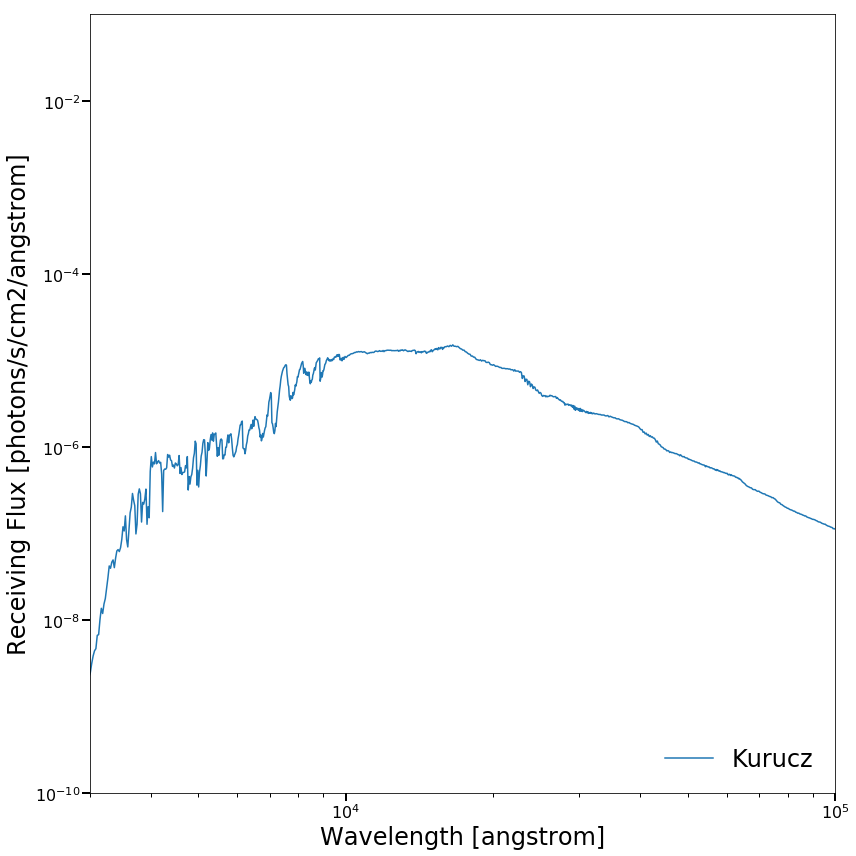

In [35]:
def input_parameter(m,teff,r,feh):
    s=5.67032e-8
    g=c.G.value*m*c.M_sun.value/(r*c.R_sun.value)**2
    L=4*np.pi*(r*c.R_sun.value)**2*s*1e7*teff**4
    L_sun=3.845e33 
    
    log_teff=np.log10(teff)
    log_g=np.log10(g)
    log_L=np.log10(L/L_sun)
    z=10**feh
    return log_teff,log_g,log_L,z

def draw_new(m,teff,r,feh,distance,mag,name):
    vflux_obs=V_flux2(mag)
    
    a=input_parameter(m,teff,r,feh)
    log_teff=a[0]
    log_g=a[1]
    log_L=a[2]
    z=a[3]

    ap = (log_teff, log_g, log_L, z)
    f=pyfits.open('kurucz2004.grid.fits')
    wavelength=f[0].data[-1]
    kurucz = Kurucz()
    sk = kurucz.generate_stellar_spectrum(*ap)
    plt.figure(figsize=(12,12))
    sk_new=[]
    for i in range(0,len(sk)):
        c1=sk[i]/(4*np.pi*(r*c.R_sun.value*1e2)**2)
        c2=(distance*c.pc.value/(r*c.R_sun.value))**2
        c3=1e-7/(c.h.value*c.c.value/wavelength[i]/1e-10)
        sk_new.append(c1/c2*c3)
        
    vflux_model=0
    for i in range(0,len(sk_new)):
        if wavelength[i]<5450+850/2 and wavelength[i]>=5450-850/2:
            vflux_model+=sk_new[i]*(wavelength[i+1]-wavelength[i])
            
    scale=vflux_obs/vflux_model
    
    sk_new2=[]
    for i in range(0,len(sk)):
        sk_new2.append(sk_new[i]*scale)
        
    ax2=plt.subplot(111)
    ax2.loglog(wavelength, sk_new2, label='Kurucz')
    #plt.loglog(sun_data[:,0]*1e4,energy, label='sun')
    ax2.legend(frameon=False, loc='lower right',fontsize=24)
    ax2.set_xlabel("Wavelength [angstrom]",fontsize=24)
    ax2.set_ylabel("Receiving Flux [photons/s/cm2/angstrom]",fontsize=24)
    ax2.tick_params(axis='both',direction='out',which='major',
                    width=2,length=8,color='black',pad=1,labelsize=16,
                   labelbottom=True, labeltop=False,labelleft=True,labelright=False, )
    ax2.tick_params(axis='both',direction='out',which='minor',
                    width=1,length=4,color='black',pad=1,labelsize=16,
                   labelbottom=True, labeltop=False,labelleft=True,labelright=False, )

    ax2.set_xlim(0.3e4, 10e4)
    ax2.set_ylim(1e-10, 1e-1)
    plt.tight_layout()


    plt.savefig('result/'+name+'_new.png',dpi=300)
    import csv
    with open('result/'+name+'_spectra_new.csv','w') as f:
        s=['wavelength','flux']
        writer=csv.DictWriter(f,fieldnames=s)
        writer.writeheader()
        for i in range(0,len(sk_new)):
            writer.writerow({'wavelength':wavelength[i],
                             'flux':sk_new[i]*scale
                            })
    
            
    return 0

draw_new(0.15,3026,0.22,10**0.39,15.1,'GJ 1214 b')

[9.09000015e+01 9.35000000e+01 9.60999985e+01 ... 1.20000000e+06
 1.40000000e+06 1.60000000e+06]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.03817630e+20
 5.58892410e+19 3.26619049e+19]
[9.09000015e+01 9.35000000e+01 9.60999985e+01 ... 1.20000000e+06
 1.40000000e+06 1.60000000e+06]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 5.35503692e+21
 2.87502714e+21 1.67677341e+21]


41.72598314142389

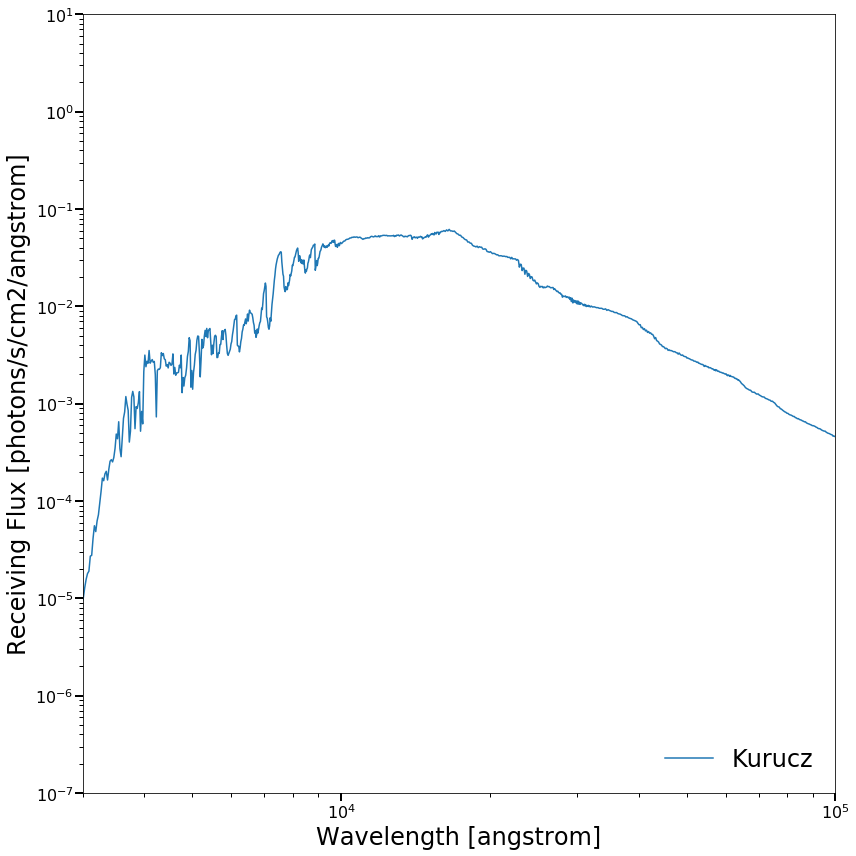

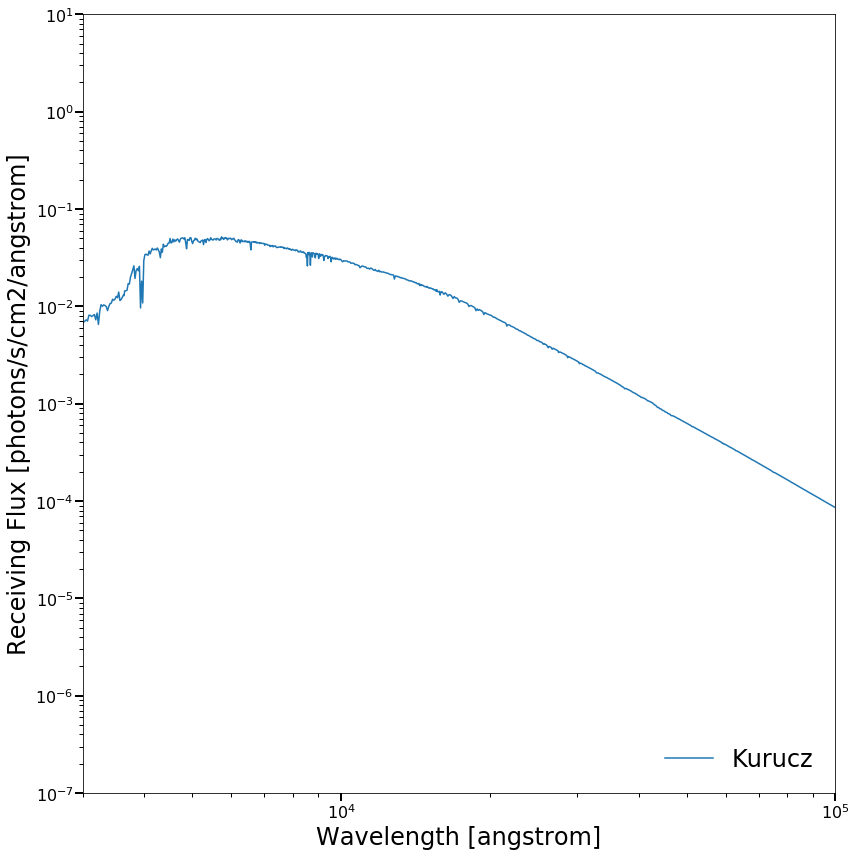

In [30]:
print(draw_new(0.15,3026,0.22,10**0.39,13,'GJ 1214 b'))
print(draw_new(1.22,6158,1.24,10**0.17,235,'HAT-P-16 b'))
print(draw_new(1.13,6001,1.37,10**(-0.16),'HAT-P-32 b'))
print(draw_new(2.28,6550,1.49,10**(-0.19),'WASP-17 b'))
print(draw_new(0.86,5400,0.89,10**(-0.03),'WASP-4 b'))
print(draw_new(0.58,4143,0.59,10**(-0.14),'WASP-80 b'))
print(draw_new(0.91,5196,0.94,10**0.31,'55 Cnc e'))
print(draw_new(1.43,6360,1.66,10**0.3,'WASP-12 b'))
print(draw_new(1.23,6091,1.19,10**0.02,'HD 209458 b'))
print(draw_new(0.93,5400,0.9,10**(-0.12),'WASP-39 b'))

0

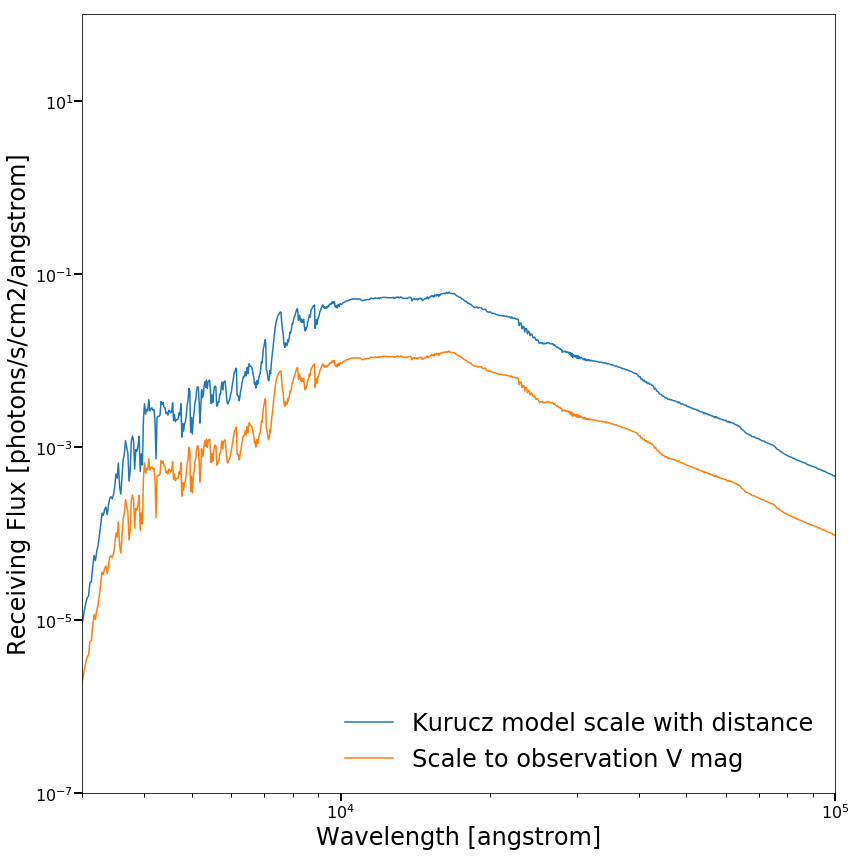

In [40]:
def draw_new(m,teff,r,feh,distance,mag,name):
    vflux_obs=V_flux2(mag)*850
    
    a=input_parameter(m,teff,r,feh)
    log_teff=a[0]
    log_g=a[1]
    log_L=a[2]
    z=a[3]

    ap = (log_teff, log_g, log_L, z)
    f=pyfits.open('kurucz2004.grid.fits')
    wavelength=f[0].data[-1]
    kurucz = Kurucz()
    sk = kurucz.generate_stellar_spectrum(*ap)
    plt.figure(figsize=(12,12))
    sk_new=[]
    for i in range(0,len(sk)):
        c1=sk[i]/(4*np.pi*(r*c.R_sun.value*1e2)**2)
        c2=(distance*c.pc.value/(r*c.R_sun.value))**2
        c3=1e-7/(c.h.value*c.c.value/wavelength[i]/1e-10)
        sk_new.append(c1/c2*c3)
        
    vflux_model=0
    for i in range(0,len(sk_new)):
        if wavelength[i]<5450+850/2 and wavelength[i]>=5450-850/2:
            vflux_model+=sk_new[i]*(wavelength[i+1]-wavelength[i])
            
    scale=vflux_obs/vflux_model
    
    sk_new2=[]
    for i in range(0,len(sk)):
        sk_new2.append(sk_new[i]*scale)
        
    ax2=plt.subplot(111)
    ax2.loglog(wavelength, sk_new, label='Kurucz model scale with distance')
    ax2.loglog(wavelength, sk_new2, label='Scale to observation V mag')
    #plt.loglog(sun_data[:,0]*1e4,energy, label='sun')
    ax2.legend(frameon=False, loc='lower right',fontsize=24)
    ax2.set_xlabel("Wavelength [angstrom]",fontsize=24)
    ax2.set_ylabel("Receiving Flux [photons/s/cm2/angstrom]",fontsize=24)
    ax2.tick_params(axis='both',direction='out',which='major',
                    width=2,length=8,color='black',pad=1,labelsize=16,
                   labelbottom=True, labeltop=False,labelleft=True,labelright=False, )
    ax2.tick_params(axis='both',direction='out',which='minor',
                    width=1,length=4,color='black',pad=1,labelsize=16,
                   labelbottom=True, labeltop=False,labelleft=True,labelright=False, )

    ax2.set_xlim(0.3e4, 10e4)
    ax2.set_ylim(1e-7, 1e2)
    plt.tight_layout()


    plt.savefig('result/'+name+'_new.png',dpi=300)
    import csv
    with open('result/'+name+'_spectra_new.csv','w') as f:
        s=['wavelength','flux']
        writer=csv.DictWriter(f,fieldnames=s)
        writer.writeheader()
        for i in range(0,len(sk_new)):
            writer.writerow({'wavelength':wavelength[i],
                             'flux':sk_new2[i]
                            })
    
            
    return 0

draw_new(0.15,3026,0.22,10**0.39,13,15.1,'GJ 1214 b')

0

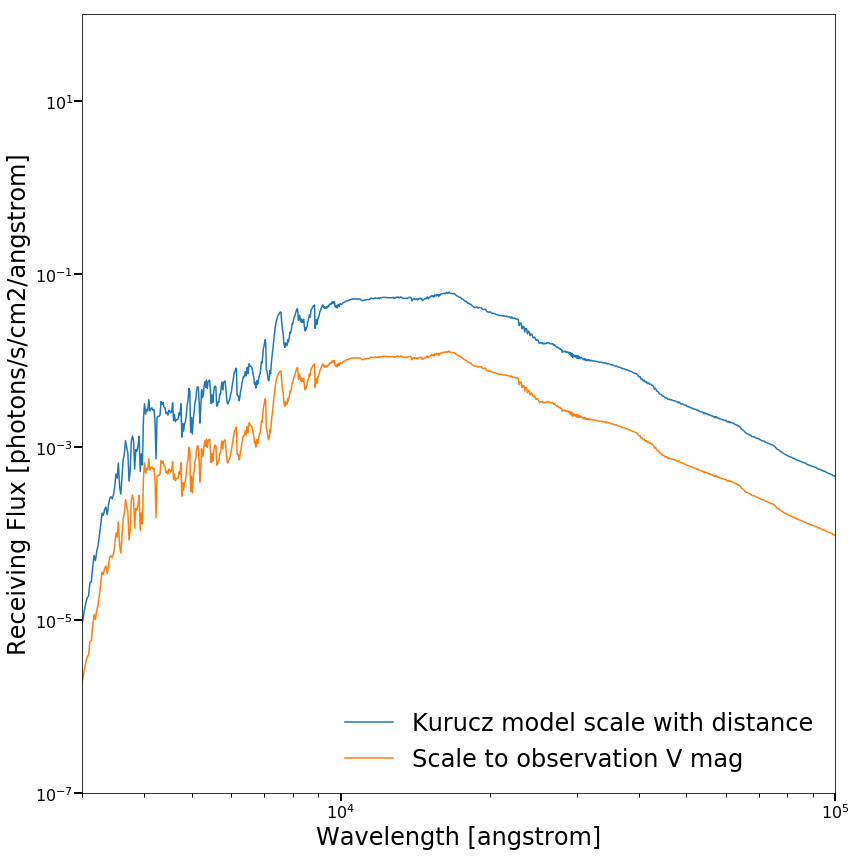

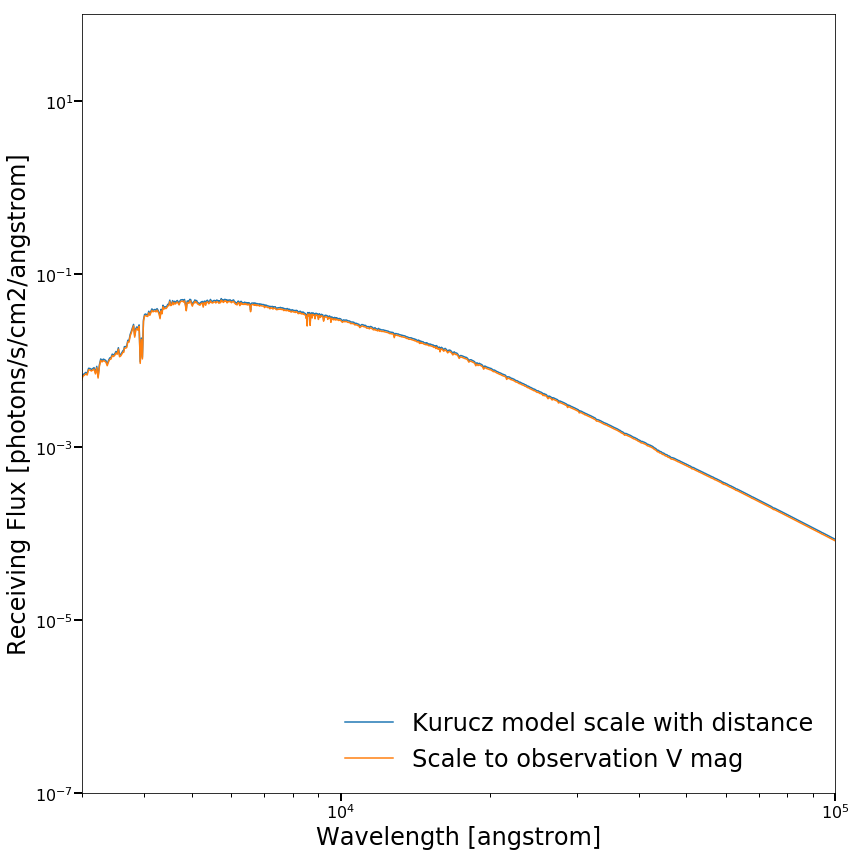

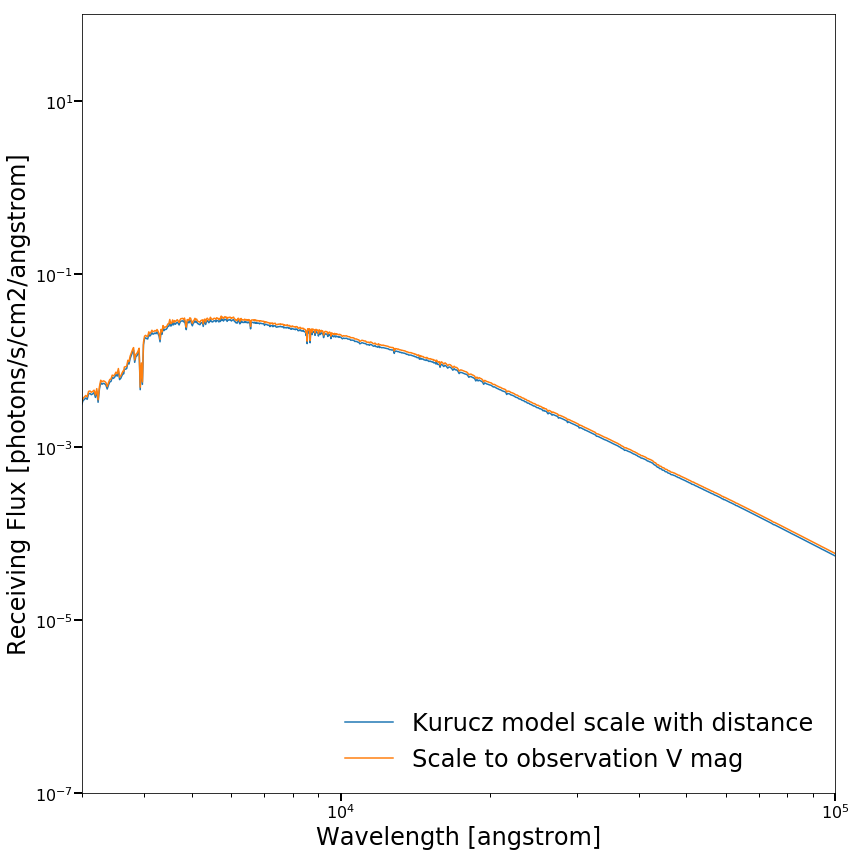

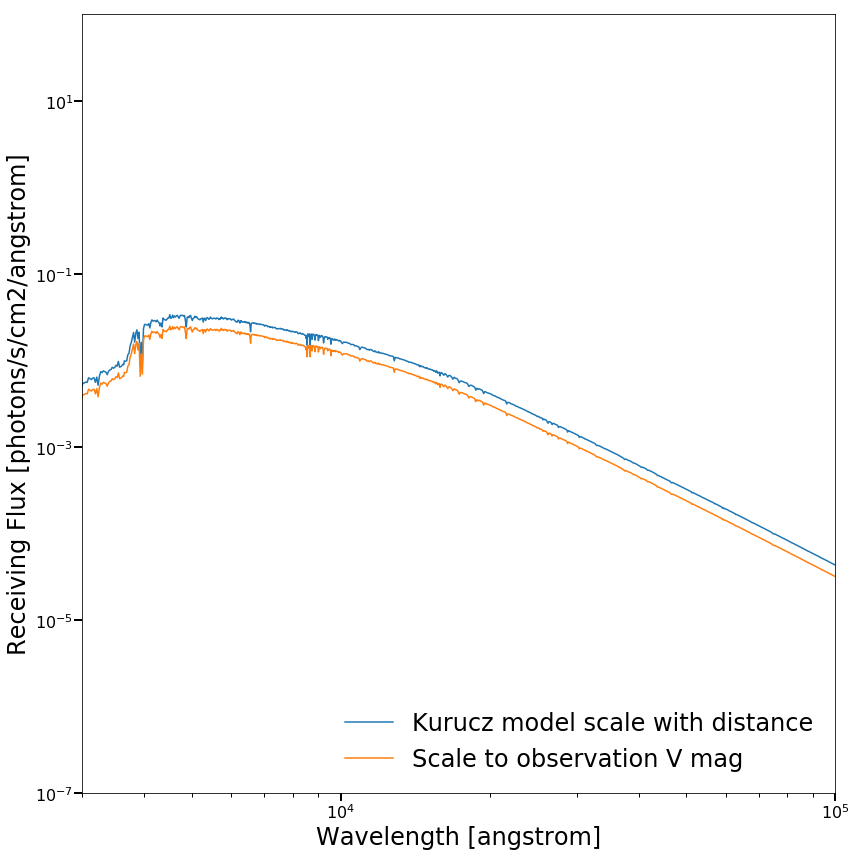

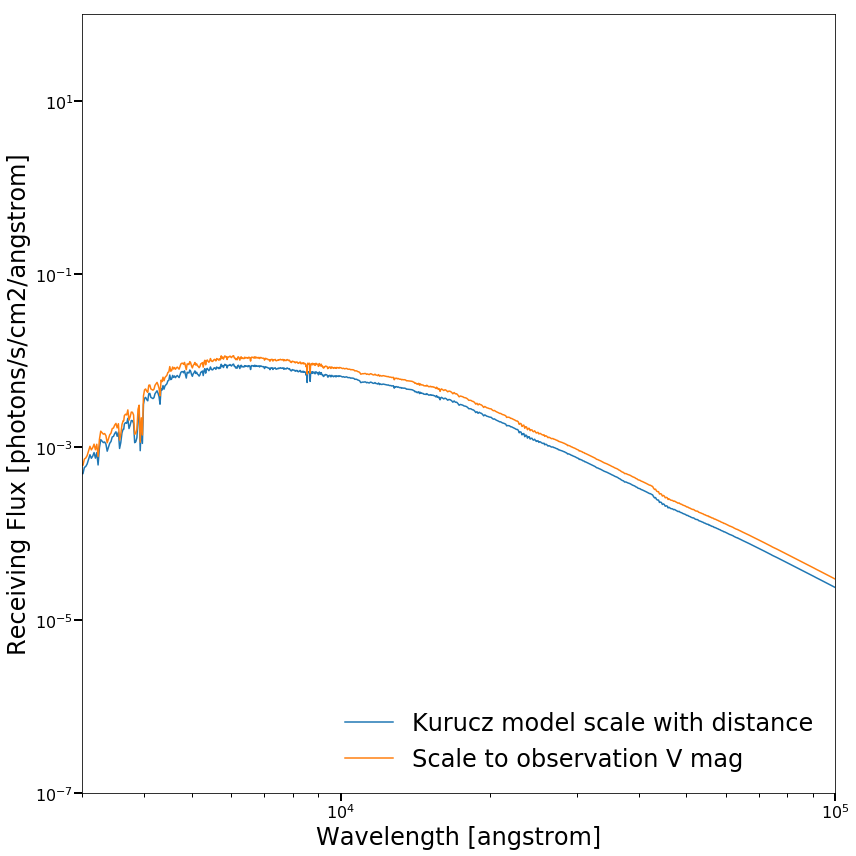

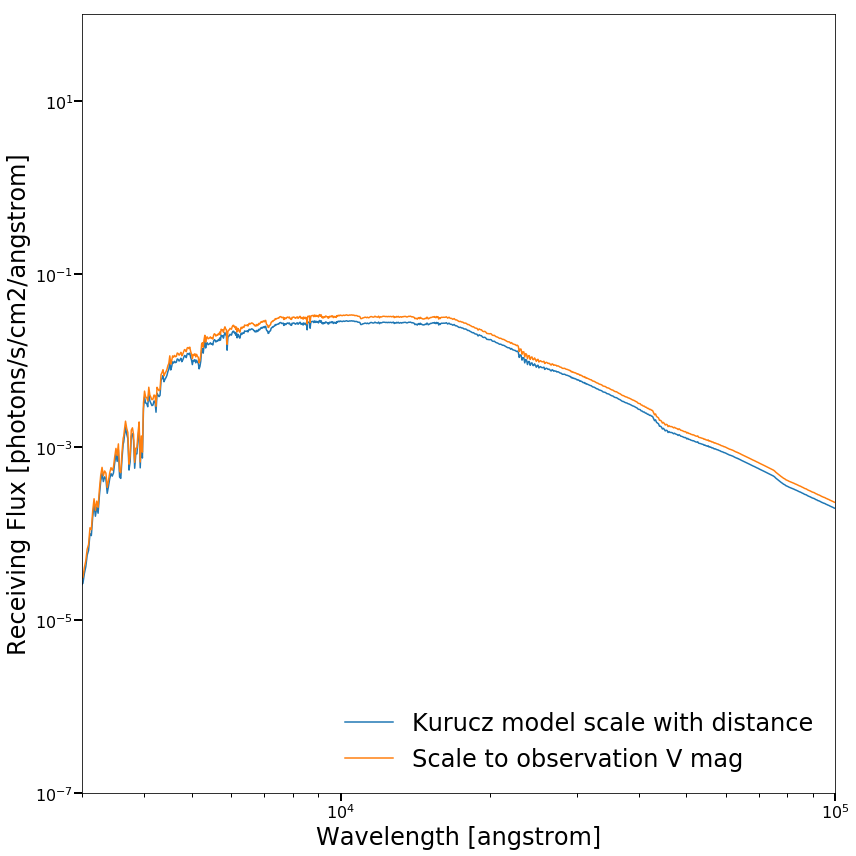

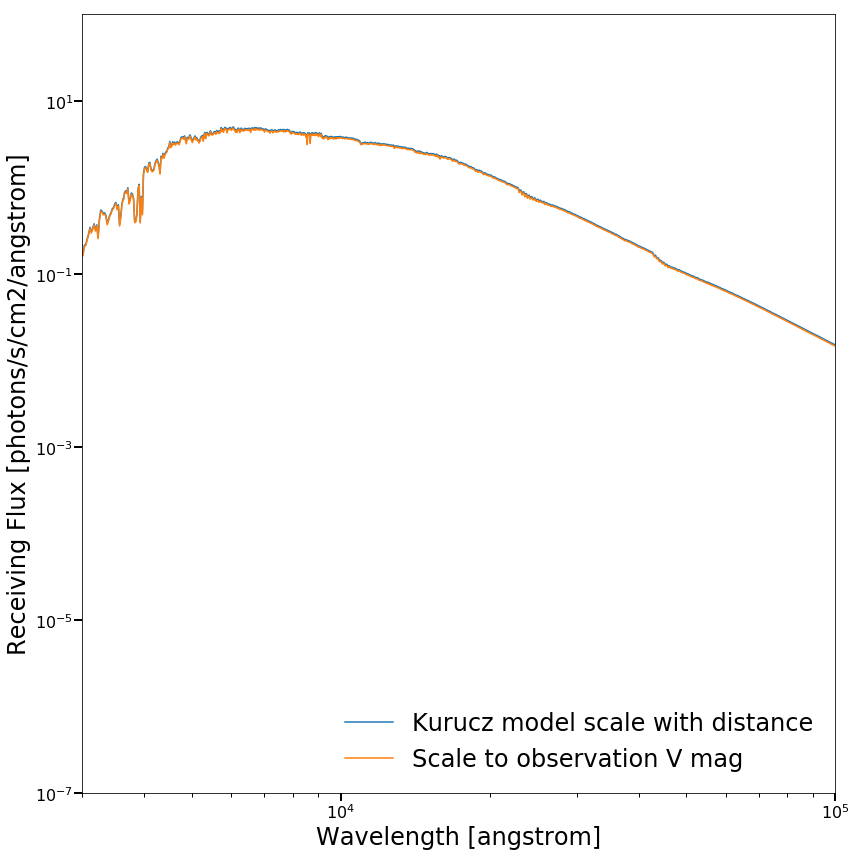

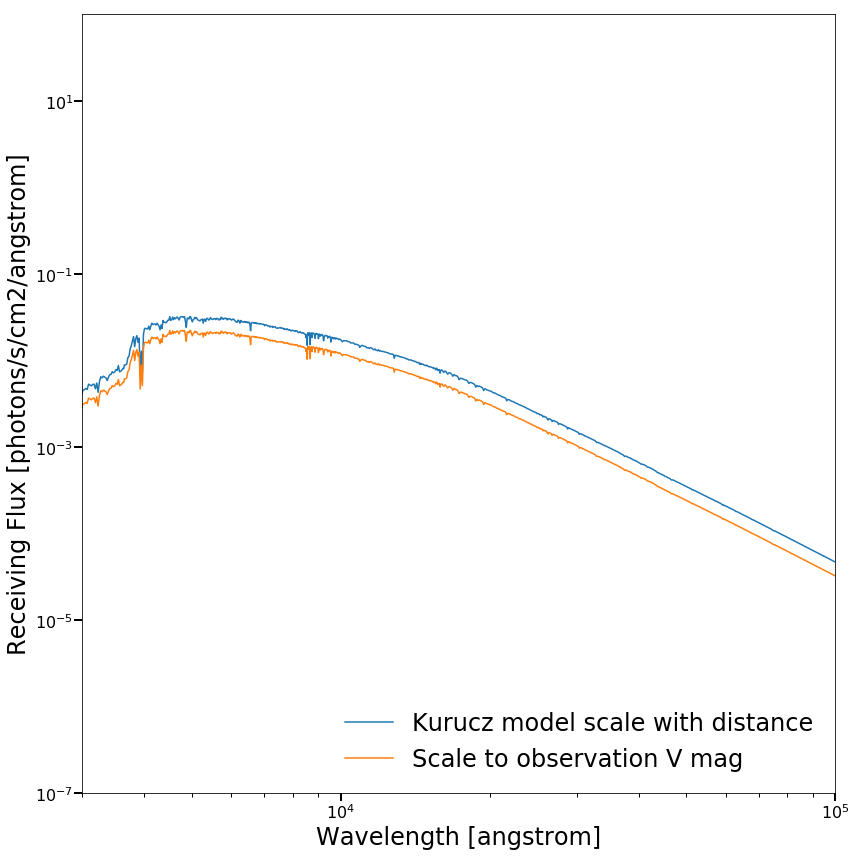

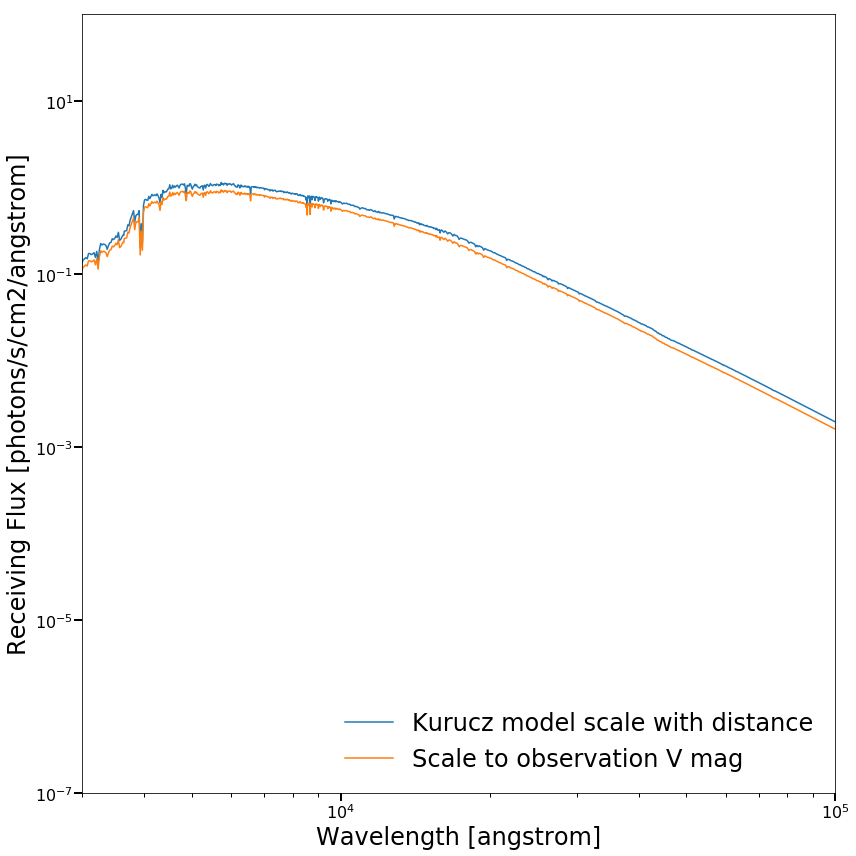

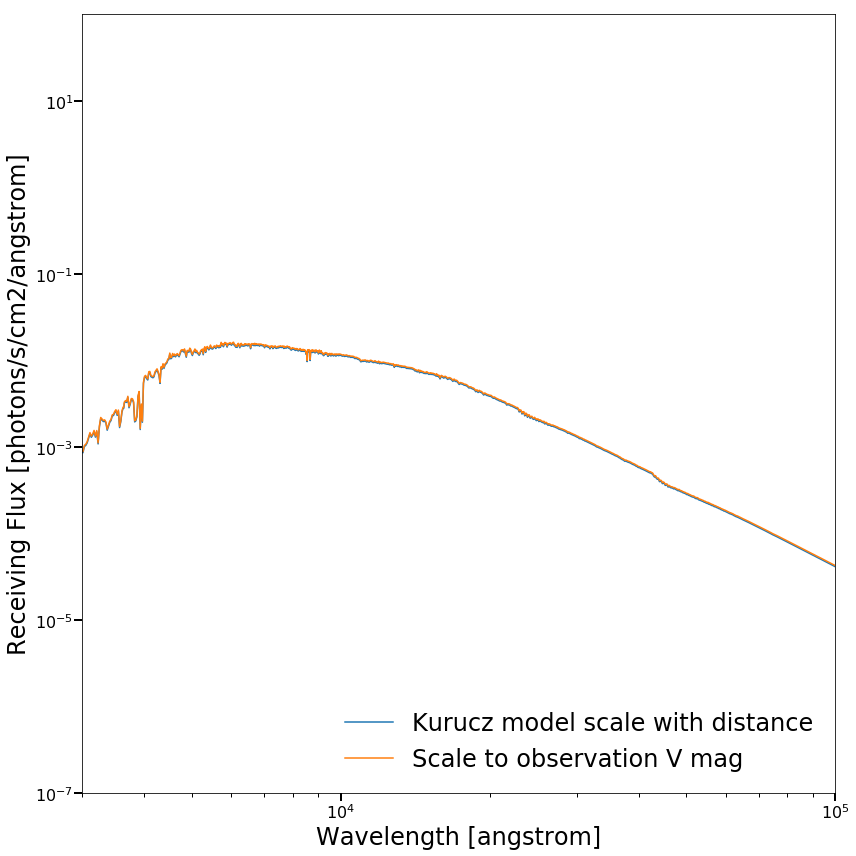

In [42]:
draw_new(0.15,3026,0.22,10**0.39,13,15.1,'GJ 1214 b')
draw_new(1.22,6158,1.24,10**0.17,235,10.812,'HAT-P-16 b')
draw_new(1.13,6001,1.37,10**(-0.16),320,11.289,'HAT-P-32 b')
draw_new(2.28,6550,1.49,10**(-0.19),410,11.6,'WASP-17 b')
draw_new(0.86,5400,0.89,10**(-0.03),300,12.5,'WASP-4 b')
draw_new(0.58,4143,0.59,10**(-0.14),60,11.87,'WASP-80 b')
draw_new(0.91,5196,0.94,10**0.31,12.34,5.96,'55 Cnc e')
draw_new(1.43,6360,1.66,10**0.3,432.5,11.69,'WASP-12 b')
draw_new(1.23,6091,1.19,10**0.02,47,7.632,'HD 209458 b')
draw_new(0.93,5400,0.9,10**(-0.12),230,12.11,'WASP-39 b')